# Context

In [ ]:
# import os
# from repo2data.repo2data import Repo2Data

# # Download Data
# data_req_path = os.path.abspath("../binder/data_requirement.json")
# if os.path.exists(data_req_path):
#     repo2data = Repo2Data(data_req_path)
#     data_path = repo2data.install()

In [1]:
from src.Utils import save_results, get_means
from src.ExistingAlgorithms import sklearn_available
from src.GaussianMixture import gaussian_mixture

from src.Dataset import dataset_dat

from sklearn.decomposition import PCA

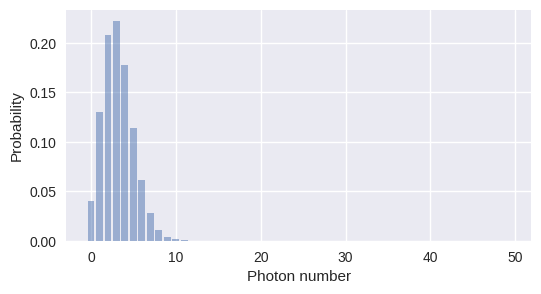

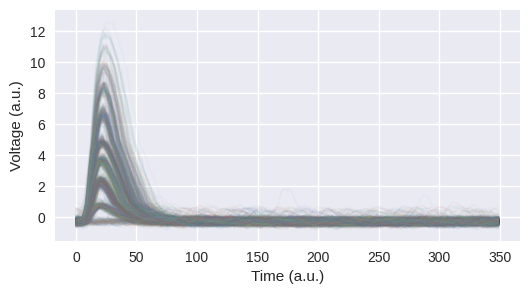

In [ ]:
SKIP = 1
# DATA
PATH_DATA = '../data/data_boulder'
PATH_RANDOM = 'Preprocess/Demo/randomIndexDemo.npy'
# PREPROCESS
PATH_INIT_MEANS = 'Preprocess/Demo/Mean_Clusters'
PATH_SAVE_LD = 'Preprocess/Demo/Low_Dimension'
# SAVE PLOTS
PATH_SAVE_D = 'Results/Demo/Density'
PATH_RESULTS = 'Results/Demo'

weights = [0.]*11 + [1] + [0]

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(
   weights = weights,
   path_data = PATH_DATA,
   path_random_index = PATH_RANDOM,
   signal_size = 8192,
   interval = [0,350],
   standardize = True,
   plot_expected = True,
   plot_traces = True,
   n_photon_number = 50
)
data_train, data_test, db_train, db_test = data_train[::SKIP], data_test[::SKIP], db_train[::SKIP], db_test[::SKIP]

In [3]:
X_l_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 1, 
   random_state = 42
)

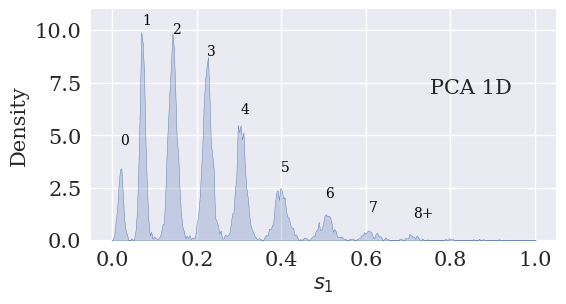

In [4]:
#| label: density

name_method = 'PCA 1D'
gm = gaussian_mixture(
   X_low = X_l_PCA[::SKIP],
   X_high = data_test,
   number_cluster = 9,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_INIT_MEANS),
   tol = 1e-4,
   info_sweep = 0,
   plot_sweep = False,
   latex = False
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = False, 
   ylim=(0, 11),
   plot_scale='linear',
   text = name_method,
   save_path = PATH_SAVE_D
)

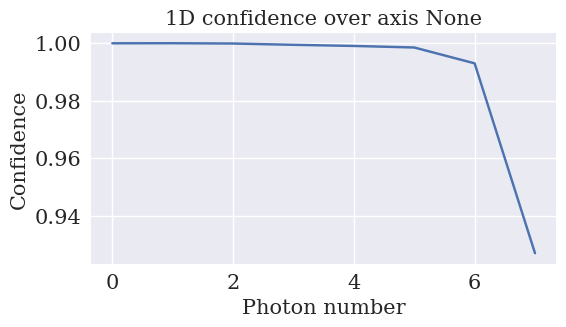

In [5]:
gm.plot_confidence_1d(expected_prob=expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

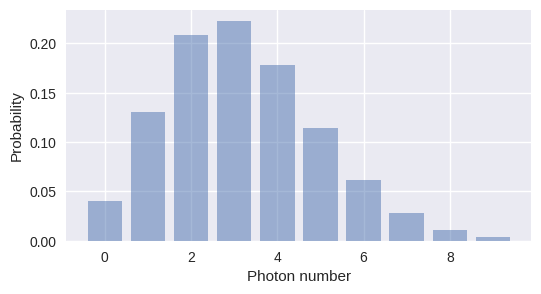

In [6]:
#| label: dist

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(
   weights = weights,
   path_data = PATH_DATA,
   path_random_index = PATH_RANDOM,
   signal_size = 8192,
   interval = [0,100],
   standardize = True,
   plot_expected = True,
   plot_traces = False,
   n_photon_number = 10
)

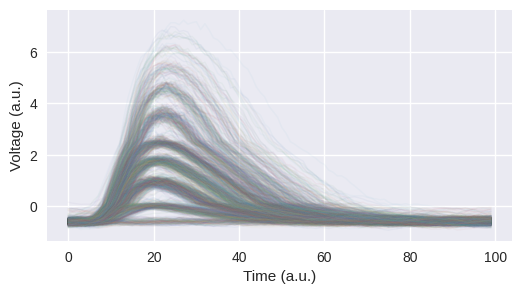

In [7]:
#| label: traces

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(
   weights = weights,
   path_data = PATH_DATA,
   path_random_index = PATH_RANDOM,
   signal_size = 8192,
   interval = [0,100],
   standardize = True,
   plot_expected = False,
   plot_traces = True,
   n_photon_number = 50
)